In [12]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
# Load on credits file
df_credits = pd.read_csv("/content/tmdb_5000_credits.csv")
df_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [8]:
# Load Movies file
df_mov = pd.read_csv("/content/tmdb_5000_movies.csv")
df_mov.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [10]:
# Check rows and columns for Credits
df_credits.shape

NameError: ignored

In [14]:
# Repeat steps for Movies
df_mov.shape

(4803, 20)

In [ ]:
# Check duplicates for Credits
sum(df_credits.duplicated())

In [15]:
# Repeat steps for Movies
sum(df_mov.duplicated())

0

In [ ]:
# Dataset types for Credits
df_credits.dtypes

In [16]:
# Repeat steps for Credits
df_mov.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [ ]:
# Any unique values for Credits?
df_credits.nunique()

In [17]:
# Repeat steps for Movies
df_mov.nunique()

budget                   436
genres                  1175
homepage                1691
id                      4803
keywords                4222
original_language         37
original_title          4801
overview                4800
popularity              4802
production_companies    3697
production_countries     469
release_date            3280
revenue                 3297
runtime                  156
spoken_languages         544
status                     3
tagline                 3944
title                   4800
vote_average              71
vote_count              1609
dtype: int64

**Problems & question?**
1. There are 4803 movies but there are 4800 unique titles. Which title has 3 duplicates?
2. 4800 titles but 4801 original titles. 2 outliers!
3. 4802 unique popularity instead of 4803. Duplicates.
4. There are 3 unique values only. Do we need?

In [ ]:
# Check detailed info for Credits
df_credits.info()

In [18]:
# Repeat steps for Movies
df_mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [19]:
df_mov.status.value_counts()
# Does it mean anything?
# There are null. What has null?

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

In [20]:
df_mov.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [21]:
# We mentioned that the number of Original Titles and Title did not match. Why?
df_mov[['original_title', 'title']].query('original_title != title')

,original_title,title
97,シン・ゴジラ,Shin Godzilla
215,4: Rise of the Silver Surfer,Fantastic 4: Rise of the Silver Surfer
235,Astérix aux Jeux Olympiques,Asterix at the Olympic Games
317,金陵十三釵,The Flowers of War
474,Évolution,Evolution
...,...,...
4699,Lumea e a mea,The World Is Mine
4719,Une femme mariée: Suite de fragments d'un film...,The Married Woman
4751,"Gabriela, Cravo e Canela",Gabriela
4790,دایره,The Circle


In [22]:
# Find movies with status 'Released'
cl_mov = df_mov[df_mov['status'] == "Released"]
cl_mov.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [23]:
# Confirm only status is "Released"
cl_mov.status.unique()

array(['Released'], dtype=object)

In [24]:
cl_mov.drop(['homepage', 'keywords', 'original_language', 'original_title', 'tagline', 'overview', 'spoken_languages', 'status'], axis=1, inplace = True)
cl_mov.head(2)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500


In [25]:
cl_mov.shape

(4795, 12)

In [26]:
cl_mov.isnull().sum()

budget                  0
genres                  0
id                      0
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
title                   0
vote_average            0
vote_count              0
dtype: int64

In [27]:
# Remove null
cl_mov.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
cl_mov.shape

(4792, 12)

In [29]:
# Check for duplicates
cl_mov[cl_mov['title'].duplicated() == True]

,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
2877,11000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 18, ""nam...",1255,27.655270,"[{""name"": ""Cineclick Asia"", ""id"": 685}, {""name...","[{""iso_3166_1"": ""KR"", ""name"": ""South Korea""}]",2006-07-27,88489643,119.0,The Host,6.7,537
3693,0,"[{""id"": 18, ""name"": ""Drama""}]",10844,0.706355,[],"[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}]",2006-10-12,0,103.0,Out of the Blue,5.9,18
4267,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",2661,9.815394,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1966-07-30,0,105.0,Batman,6.1,203


In [30]:
cl_mov[cl_mov['title'].str.contains('The Host')]

,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
972,44000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",72710,42.933027,"[{""name"": ""Nick Wechsler Productions"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-03-22,63327201,125.0,The Host,6.0,1817
2877,11000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 18, ""nam...",1255,27.655270,"[{""name"": ""Cineclick Asia"", ""id"": 685}, {""name...","[{""iso_3166_1"": ""KR"", ""name"": ""South Korea""}]",2006-07-27,88489643,119.0,The Host,6.7,537


In [31]:
cl_mov[cl_mov['title'].str.contains('Out of the Blue')]

,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
3647,0,"[{""id"": 18, ""name"": ""Drama""}]",39269,0.679351,"[{""name"": ""Robson Street"", ""id"": 71953}]","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}]",1980-05-01,0,94.0,Out of the Blue,6.5,17
3693,0,"[{""id"": 18, ""name"": ""Drama""}]",10844,0.706355,[],"[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}]",2006-10-12,0,103.0,Out of the Blue,5.9,18


In [32]:
cl_mov[cl_mov['title'].str.contains('Batman')]

,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
9,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",209112,155.790452,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""A...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-03-23,873260194,151.0,Batman v Superman: Dawn of Justice,5.7,7004
119,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",272,115.040024,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2005-06-10,374218673,140.0,Batman Begins,7.5,7359
210,125000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",415,50.073575,"[{""name"": ""PolyGram Filmed Entertainment"", ""id...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1997-06-20,238207122,125.0,Batman & Robin,4.2,1418
299,100000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",414,48.205606,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1995-05-31,336529144,121.0,Batman Forever,5.2,1498
428,80000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 14, ""nam...",364,59.113174,"[{""name"": ""PolyGram Filmed Entertainment"", ""id...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1992-06-19,280000000,126.0,Batman Returns,6.6,1673
1359,35000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",268,44.104469,"[{""name"": ""PolyGram Filmed Entertainment"", ""id...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1989-06-23,411348924,126.0,Batman,7.0,2096
3854,3500000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 16, ""nam...",142061,25.891466,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""W...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-01-18,0,78.0,"Batman: The Dark Knight Returns, Part 2",7.9,419
4267,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",2661,9.815394,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1966-07-30,0,105.0,Batman,6.1,203


In [ ]:
# 2 or more movies can have the same name.

In [ ]:
# Create extra copy of Credits for cleaning
cl_credits = df_credits

In [ ]:
# Drop 'crew' since we do not need them.
cl_credits.drop(['crew'], axis = 1, inplace = True)
cl_credits.head(2)

In [33]:
# Change datatype from release_date to datetime
cl_mov['release_date'] = pd.to_datetime(cl_mov['release_date'])
cl_mov.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


budget                           int64
genres                          object
id                               int64
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
title                           object
vote_average                   float64
vote_count                       int64
dtype: object

In [34]:
# Check on 'genre'. Recommended by articles. But I don't know what it means.
x = []
for item in cl_mov['genres']:
    for dice in item:  
        for value in dice:
            x.append(value)
x[0:10]

['[', '{', '"', 'i', 'd', '"', ':', ' ', '2', '8']

In [35]:
cl_mov['genres'].items()

In [36]:
genre_details = list(map(str,(cl_mov['genres'])))
genre_details[0:10]

['[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]',
 '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]',
 '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]',
 '[{"id": 28, "name": "Action"}, {"id": 80, "name": "Crime"}, {"id": 18, "name": "Drama"}, {"id": 53, "name": "Thriller"}]',
 '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 878, "name": "Science Fiction"}]',
 '[{"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}]',
 '[{"id": 16, "name": "Animation"}, {"id": 10751, "name": "Family"}]',
 '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 878, "name": "Science Fiction"}]',
 '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 10751, "name": "Family"}]',
 '[{"id": 28, "name": "Action"}, {"id": 12, "name": 

In [ ]:
genre = []
for i in genre_details:
    split_genre = list(map(str, i.split('[')))
    for j in split_genre:
        if j not in genre:
            genre.append(j)
print(genre[0:10])

In [37]:
# Explore release_date
cl_mov['year'] = cl_mov['release_date'].dt.year
cl_mov.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Avatar,7.2,11800,2009
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Spectre,6.3,4466,2015
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,2012
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,John Carter,6.1,2124,2012


In [38]:
cl_mov['month'] = cl_mov['release_date'].dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
cl_mov['day'] = cl_mov['release_date'].dt.weekday

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
cl_mov.head(5)

,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,year,month,day
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Avatar,7.2,11800,2009,12,3
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,2007,5,5
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Spectre,6.3,4466,2015,10,0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,2012,7,0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,John Carter,6.1,2124,2012,3,2


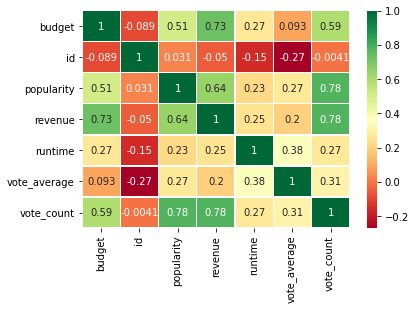

In [41]:
#Are there correlation with everything and anything?
sns.heatmap(df_mov.corr(), cmap = 'RdYlGn', annot = True, linewidths = 0.3);

In [ ]:
#Highest correlation value = 0.78
#I'm interested with all the greens
#1) 0.78 popularity & vote_count | revenue & vote_count
#2) 0.73 revenue & budget
#3) 0.64 popularity & revenue
#4) 0.59 vote_count & budget
#Revenue popped out several times.
#Linear Regression applicable for Revenue?
sns.distplot(df_mov.revenue);

In [43]:
#Too skewed. Articles mentioned that log transformation required.
df_mov['log_revenue'] = np.log1p(df_mov['revenue'])
df_mov['log_budget'] = np.log1p(df_mov['budget'])

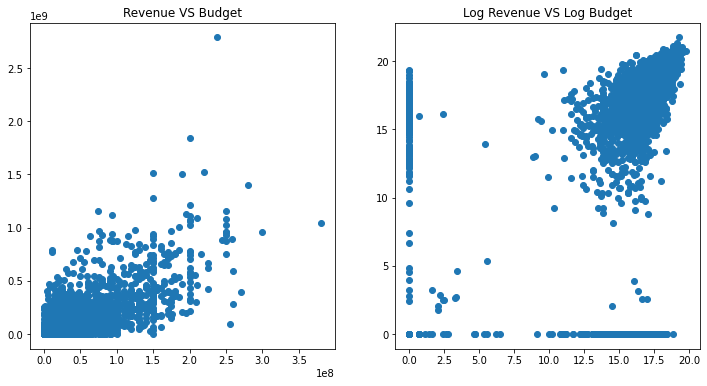

In [44]:
#Meanwhile, I want to see relationships with scatterplot.

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(df_mov['budget'], df_mov['revenue'])
plt.title('Revenue VS Budget');
plt.subplot(1,2,2)
plt.scatter(df_mov['log_budget'], df_mov['log_revenue'])
plt.title('Log Revenue VS Log Budget');

In [45]:
#Related but not clear.
#According to log graph, there are alot movies on zero budget. 
#These are also the outliers.
df_mov_budget_0count = df_mov.groupby('budget').count()['id']
df_mov_budget_0count.head(2)

budget
0    1037
1       7
Name: id, dtype: int64

In [46]:
#Out of the box. Revenue relate to website?
df_mov['homepage'].value_counts().head(10)

http://www.missionimpossible.com/       4
http://www.thehungergames.movie/        4
http://www.thehobbit.com/               3
http://www.kungfupanda.com/             3
http://www.transformersmovie.com/       3
http://www.ironmanmovie.com/            2
http://www.riomovies.com/               2
http://www.indianajones.com             2
http://www.workandtheglory.com/         2
http://www.howtotrainyourdragon.com/    2
Name: homepage, dtype: int64

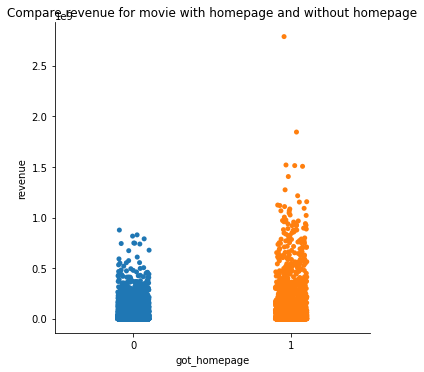

In [47]:
df_mov['got_homepage'] = 0
df_mov.loc[df_mov['homepage'].isnull() == False, 'got_homepage'] = 1
sns.catplot(x= 'got_homepage', y = 'revenue', data = df_mov);
plt.title('Compare revenue for movie with homepage and without homepage');

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

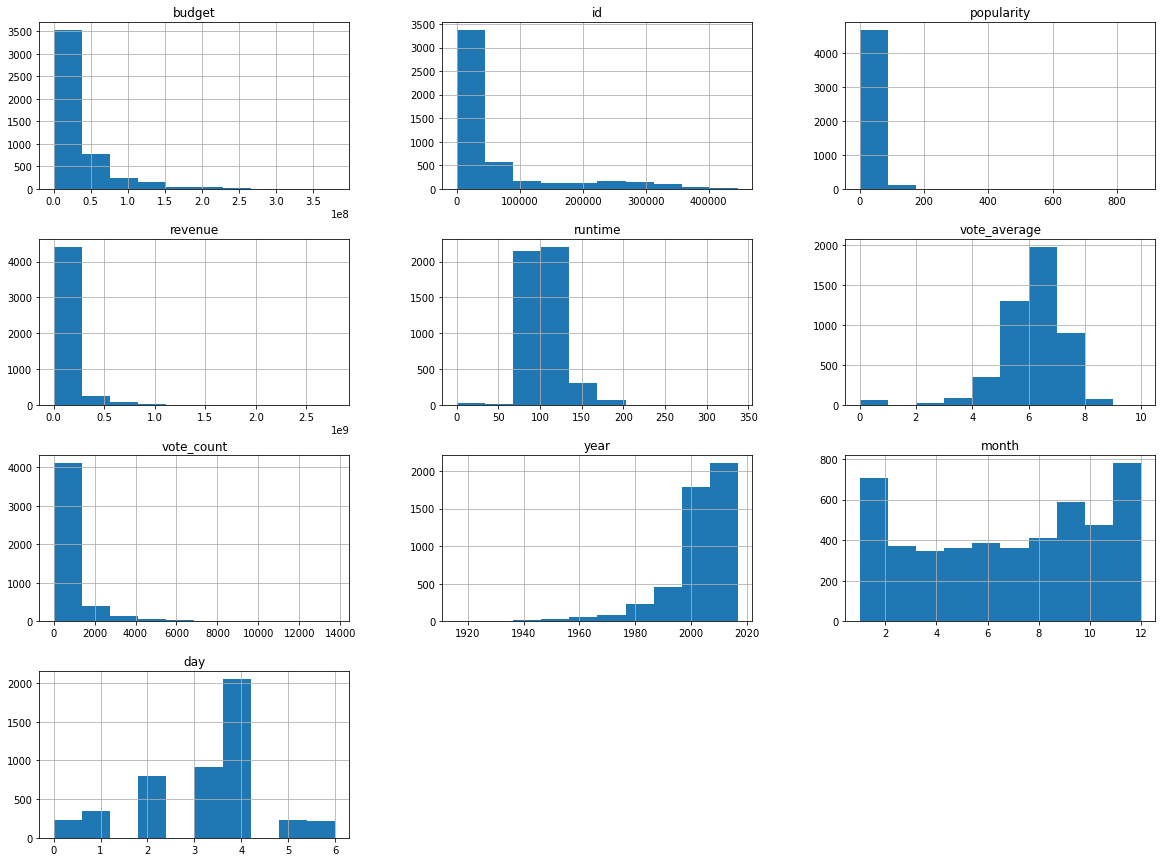

In [48]:
cl_mov.hist(figsize = (20,15));

In [49]:
cl_mov.count()  

budget                  4792
genres                  4792
id                      4792
popularity              4792
production_companies    4792
production_countries    4792
release_date            4792
revenue                 4792
runtime                 4792
title                   4792
vote_average            4792
vote_count              4792
year                    4792
month                   4792
day                     4792
dtype: int64

In [50]:
# Install Profit Formula
cl_mov['profit'] = cl_mov['revenue'] - cl_mov['budget']
cl_mov.profit.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    2550965087
1     661000000
Name: profit, dtype: int64

In [51]:
# Seperate the necessay variables and groupby weekdays 
df1 = cl_mov.groupby('day')[['day', 'profit', 'popularity']]
df1.head(2)

,day,profit,popularity
0,3,2550965087,150.437577
1,5,661000000,139.082615
2,0,635674609,107.376788
3,0,834939099,112.312950
4,2,24139100,43.926995
5,1,632871626,115.699814
6,2,331794936,48.681969
8,1,683959197,98.885637
11,3,386090727,107.928811
17,5,665713802,135.413856


In [52]:
# Take dependent variables' means
df1_v1 = df1.mean()
df1_v1

,day,profit,popularity
day,,,
0,0.0,6.450643e+07,21.081432
1,1.0,8.246036e+07,26.415341
2,2.0,9.453941e+07,32.694124
3,3.0,6.127414e+07,24.703346
4,4.0,3.063554e+07,16.303436
5,5.0,4.522813e+07,16.916489
6,6.0,3.297819e+07,14.356027


In [53]:
# Profit Mean
pf_mean = cl_mov.profit.mean()
pf_mean

53341534.88981636

In [54]:
# Popularity Mean
pt_mean = cl_mov.popularity.mean()
pt_mean

21.54072788960771

In [55]:
# Define variables for index, width and xticks. I don't understand but it is recommended.
ind = np.arange(len(df1.nunique()['day']))
width = 0.35
ind + width

array([0.35, 1.35, 2.35, 3.35, 4.35, 5.35, 6.35])

In [56]:
# Define weekdays' order
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
sorterIndex

{'Friday': 4,
 'Monday': 0,
 'Saturday': 5,
 'Sunday': 6,
 'Thursday': 3,
 'Tuesday': 1,
 'Wednesday': 2}

In [57]:
df1_v1['day_id'] = df1_v1.index
df1_v1['day_id'] = df1_v1['day_id'].map(sorterIndex)
df1_v1

,day,profit,popularity,day_id
day,,,,
0,0.0,6.450643e+07,21.081432,NaN
1,1.0,8.246036e+07,26.415341,NaN
2,2.0,9.453941e+07,32.694124,NaN
3,3.0,6.127414e+07,24.703346,NaN
4,4.0,3.063554e+07,16.303436,NaN
5,5.0,4.522813e+07,16.916489,NaN
6,6.0,3.297819e+07,14.356027,NaN


In [58]:
# ???
df1_v1.index

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='day')

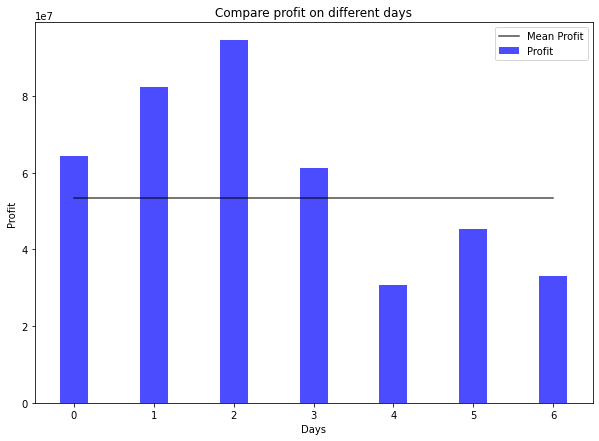

In [59]:
# Profit comparison across days
plt.figure(figsize=(10, 7))
pro = plt.bar(ind, df1_v1['profit'], width, color = 'blue', alpha=.7, label='Profit')
plt.plot(ind, np.repeat(pf_mean, 7), '-', color = 'black',  alpha=.7, label='Mean Profit')
plt.ylabel('Profit')
plt.xlabel('Days')
plt.title('Compare profit on different days')
plt.xticks(ind, df1_v1.index)
plt.legend()


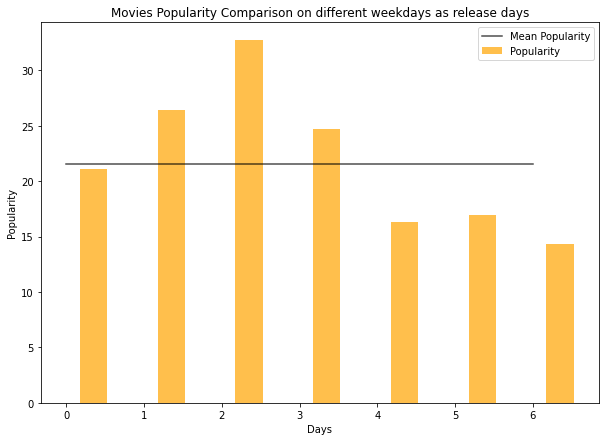

In [60]:
# Compare popularity on different days
plt.figure(figsize=(10, 7))
pop = plt.bar(ind+width, df1_v1['popularity'], width, color = 'orange', alpha=.7, label='Popularity')
plt.plot(ind, np.repeat(pt_mean, 7), '-', color = 'black',  alpha=.7, label='Mean Popularity')
plt.ylabel('Popularity')
plt.xlabel('Days')
plt.title('Movies Popularity Comparison on different weekdays as release days')
plt.xticks(ind, df1_v1.index)
plt.legend()



In [61]:
cl_mov.query('year >= 2007')['year'].value_counts()

2009    246
2014    238
2013    231
2008    227
2010    225
2011    221
2015    212
2012    208
2007    195
2016    104
2017      1
Name: year, dtype: int64

In [62]:
# Import ML 
import numpy as np
import pandas as pd
import sklearn
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import datetime
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, KFold
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn import model_selection # for splitting into train and test
import json
import ast
from urllib.request import urlopen
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import time
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
#import eli5
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
print('Libraries imported..')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Libraries imported..


In [63]:
# Genre
df_mov.genres = df_mov.genres.apply(lambda x: list(map(lambda d: list(d.values())[1], ast.literal_eval(x)) if isinstance(x, str) else []))
df_mov.genres.head()

0    [Action, Adventure, Fantasy, Science Fiction]
1                     [Adventure, Fantasy, Action]
2                       [Action, Adventure, Crime]
3                 [Action, Crime, Drama, Thriller]
4             [Action, Adventure, Science Fiction]
Name: genres, dtype: object

In [64]:
unique_genres = df_mov["genres"].apply(pd.Series).stack().unique()
print("Number of genres: {}".format(len(unique_genres)))
print("Genres: {}".format(unique_genres))

Number of genres: 20
Genres: ['Action' 'Adventure' 'Fantasy' 'Science Fiction' 'Crime' 'Drama'
 'Thriller' 'Animation' 'Family' 'Western' 'Comedy' 'Romance' 'Horror'
 'Mystery' 'History' 'War' 'Music' 'Documentary' 'Foreign' 'TV Movie']


In [65]:
genres_dummies = pd.get_dummies(df_mov["genres"].apply(pd.Series).stack()).sum(level=0) #one hot encoding
genres_dummies.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [66]:
train_genres = pd.concat([df_mov, genres_dummies],axis=1, sort=False) #merging two data frame
train_genres.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,log_revenue,log_budget,got_homepage,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,21.748578,19.283571,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,20.683485,19.519293,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,20.596199,19.316769,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,20.804790,19.336971,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,19.464974,19.376192,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


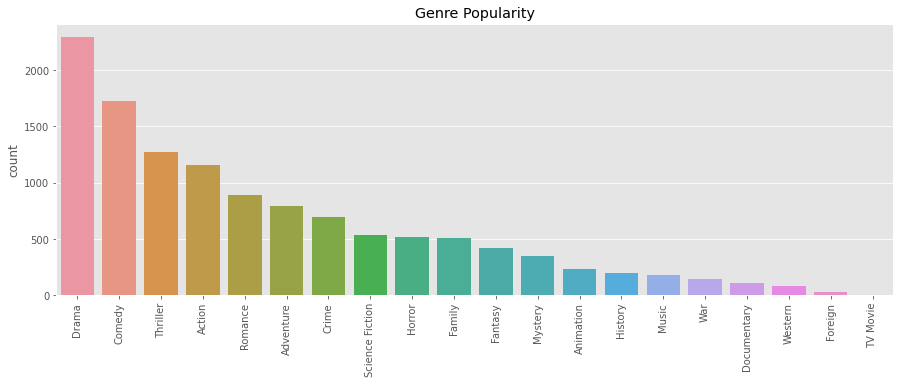

In [67]:
genres_overall = train_genres[unique_genres].sum().sort_values(ascending=False)
plt.figure(figsize=(15,5))
ax = sns.barplot(x=genres_overall.index, y=genres_overall.values)
plt.xticks(rotation=90)
plt.title("Genre Popularity")
plt.ylabel("count")
plt.show()

In [68]:
train_genres.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'log_revenue', 'log_budget', 'got_homepage', 'Action',
       'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [69]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] #so that easy for us to perform  train and test
df_train=train_genres.select_dtypes(include=numerics)

In [70]:
# Drop id column
df_train.drop(columns=['id'],inplace=True)
df_train=df_train.fillna(df_train.median()) 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
df_train.columns

Index(['budget', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count', 'log_revenue', 'log_budget', 'got_homepage', 'Action',
       'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [72]:
# Train the model
X = df_train.drop(['revenue', 'log_revenue'], axis=1)
y= df_train['revenue'] #prediction

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [74]:
#linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)
lm_preds = lm.predict(X_test)
print("R Square: ", r2_score(y_test, lm_preds))

R Square:  0.730284007980677


In [76]:
#random forrest
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(random_state =0, n_estimators=500, max_depth=10)
RF_model.fit(X_train, y_train)

y_hat = RF_model.predict(X_test)
print ("R-Squared is:", metrics.r2_score(y_hat, y_test))



R-Squared is: 0.6916478489155297


                 importance
feature                    
vote_count            0.628
budget                0.114
log_budget            0.107
popularity            0.034
runtime               0.034
vote_average          0.020
Family                0.014
Adventure             0.007
Fantasy               0.005
Thriller              0.004
Science Fiction       0.004
Animation             0.004
Romance               0.004
Drama                 0.003
Comedy                0.003
Action                0.003
got_homepage          0.003
Music                 0.002
Crime                 0.001
Horror                0.001
Mystery               0.001
Documentary           0.000
Foreign               0.000
History               0.000
TV Movie              0.000
War                   0.000
Western               0.000


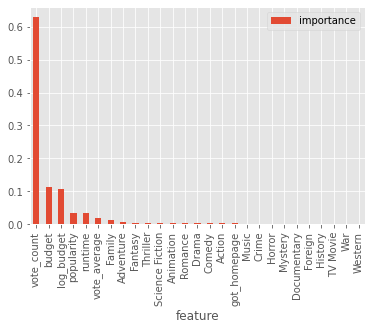

In [89]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(RF_model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature');
print(importances)
importances.plot.bar();

In [90]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}

In [91]:
lgb_model = lgb.LGBMRegressor(**params, n_estimators = 10000, nthread = 4, n_jobs = -1)

In [93]:
lgb_model.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
        verbose=1000, early_stopping_rounds=200)

#eli5.show_weights(lgb_model, feature_filter=lambda x: x != '<BIAS>')

Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[381]	training's rmse: 6.57722e+07	valid_1's rmse: 7.25927e+07


LGBMRegressor(bagging_fraction=0.9, bagging_freq=1, bagging_seed=11,
              boosting='gbdt', boosting_type='gbdt', class_weight=None,
              colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', lambda_l1=0.2, learning_rate=0.01,
              max_depth=5, metric='rmse', min_child_samples=20,
              min_child_weight=0.001, min_data_in_leaf=20, min_split_gain=0.0,
              n_estimators=10000, n_jobs=-1, nthread=4, num_leaves=30,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0, verbosity=-1)

In [94]:
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': .01, 'loss': 'ls'} 
clf = ensemble.GradientBoostingRegressor(**params)
predictions2 = clf.fit(X_train,y_train)
training_score = clf.score(X_train, y_train)
print(f"Training Score: {training_score}")

Training Score: 0.8910103560432319


In [95]:
predictions2 = np.expand_dims(clf.predict(X_test), axis = 1)
MSE = mean_squared_error(y_test, predictions2)
r2 = clf.score(X_test, y_test)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 3261512710012580.0, R2: 0.8808210415619998


In [96]:
revenue_predictions = clf.predict(X_test)
gbr_predictions = pd.DataFrame(revenue_predictions, columns = ['predicted_revenue'])
gbr_predictions.head()

,predicted_revenue
0,6.433161e+07
1,1.617601e+07
2,6.254707e+06
3,4.421009e+07
4,1.852488e+07


In [110]:
test_result = pd.concat([train_genres, gbr_predictions], axis = 1, sort=True)
test_result = test_result[[ 'budget', 'genres', 'popularity','revenue','predicted_revenue']]
test_result.head()

,budget,genres,popularity,revenue,predicted_revenue
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",150.437577,2787965087,6.433161e+07
1,300000000,"[Adventure, Fantasy, Action]",139.082615,961000000,1.617601e+07
2,245000000,"[Action, Adventure, Crime]",107.376788,880674609,6.254707e+06
3,250000000,"[Action, Crime, Drama, Thriller]",112.312950,1084939099,4.421009e+07
4,260000000,"[Action, Adventure, Science Fiction]",43.926995,284139100,1.852488e+07


In [111]:
test_result.tail()

,budget,genres,popularity,revenue,predicted_revenue
4798,220000,"[Action, Crime, Thriller]",14.269792,2040920,NaN
4799,9000,"[Comedy, Romance]",0.642552,0,NaN
4800,0,"[Comedy, Drama, Romance, TV Movie]",1.444476,0,NaN
4801,0,[],0.857008,0,NaN
4802,0,[Documentary],1.929883,0,NaN
